In [1]:
from graph_tool.all import *

# Read 1.1.1.391

In [127]:
clusters_file = open('/agh/projects/noelia/NLP/zymCTRL/mmseqs-search-analysis/cluster_classes/fastas/1.1.1.391/fiftyclusterRes_cluster.tsv')


In [128]:
clusters = {}
for line in clusters_file:
    rep, other = line.split()
    if not rep in clusters:
        clusters[rep] = []
    clusters[rep].append(other)
        
clusters_file.close()

In [103]:
clusters

{'4.1.1.72_0': ['4.1.1.72_0',
  '4.1.1.72_16',
  '4.1.1.72_20',
  '4.1.1.72_22',
  '4.1.1.72_24',
  '4.1.1.72_31',
  '4.1.1.72_10',
  '4.1.1.72_11',
  '4.1.1.72_14',
  '4.1.1.72_15',
  '4.1.1.72_21',
  '4.1.1.72_25',
  '4.1.1.72_26',
  '4.1.1.72_28',
  '4.1.1.72_29',
  '4.1.1.72_2',
  '4.1.1.72_30',
  '4.1.1.72_32',
  '4.1.1.72_35',
  '4.1.1.72_36',
  '4.1.1.72_37',
  '4.1.1.72_38',
  '4.1.1.72_39',
  '4.1.1.72_3',
  '4.1.1.72_40',
  '4.1.1.72_41',
  '4.1.1.72_4',
  '4.1.1.72_6',
  '4.1.1.72_7',
  '4.1.1.72_8',
  '4.1.1.72_9'],
 '4.1.1.72_12': ['4.1.1.72_12',
  '4.1.1.72_13',
  '4.1.1.72_17',
  '4.1.1.72_18',
  '4.1.1.72_19',
  '4.1.1.72_1',
  '4.1.1.72_23',
  '4.1.1.72_27',
  '4.1.1.72_33',
  '4.1.1.72_34',
  '4.1.1.72_5']}

In [104]:
#1.1.1.391
brenda_matches = open('/agh/projects/noelia/NLP/zymCTRL/mmseqs-search-analysis/generation/1.1.1.391/alnres')


In [105]:
matched_hits = []
for line in brenda_matches:
    gen, nat = line.split()[:2]
    #print(gen,nat)
    matched_hits.append([rep for rep,rest in clusters.items() if (nat == rep or nat in rest)])

In [106]:
matched_hits
flat_list = [item for sublist in matched_hits for item in sublist]

In [107]:
a=list(set(flat_list))


In [108]:
for rep in clusters.keys():
        if rep not in a:
            print(value,"hast not been sampled")

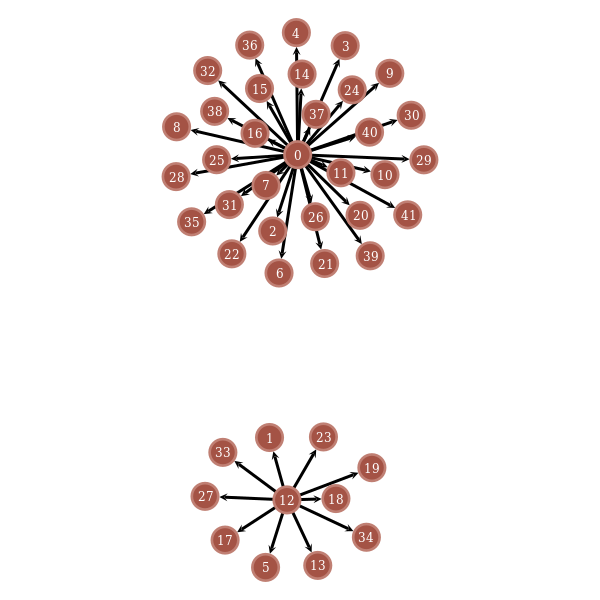

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f0085dca208, at 0x7f0085dca0f0>

In [109]:
g = Graph()
g.vp.name = g.new_vertex_property("string")
g.vp.type = g.new_vertex_property("string")
g.vp.color = g.new_vertex_property("string")
g.vp.edgecolor = g.new_vertex_property("string")
g.vp.vsize = g.new_vertex_property("int")
for key in clusters.keys(): 
    v = g.add_vertex()
    g.vp.name[v] = key.split('_')[1]
    g.vp.type[v] = 'rep'
    g.vp.color[v] = "#A45345"
    g.vp.edgecolor[v] = "#c07f73"
    g.vp.vsize[v] = 20
for key,values in clusters.items():
    for value in values:
        if key.split('_')[1] == value.split('_')[1]:
            continue
        v2 = g.add_vertex()
        g.vp.name[v2] = value.split('_')[1]
        g.vp.type[v2] = 'nat'
        g.vp.color[v2] = "#A45345"
        g.vp.edgecolor[v2] = "#c07f73"
        g.vp.vsize[v2] = 20
        v1 = find_vertex(g, g.vp.name, key.split('_')[1])[0]
        ae = g.add_edge(v1, v2)

matched_hits = []
graph_draw(g,vertex_fill_color=g.vertex_properties['color'],
           vertex_color=g.vertex_properties['edgecolor'],
           edge_color='black',edge_pen_width=3, vertex_text=g.vertex_properties['name'],
           font_family='arial',font_weigth='cairo.FONT_WEIGHT_BOLD')


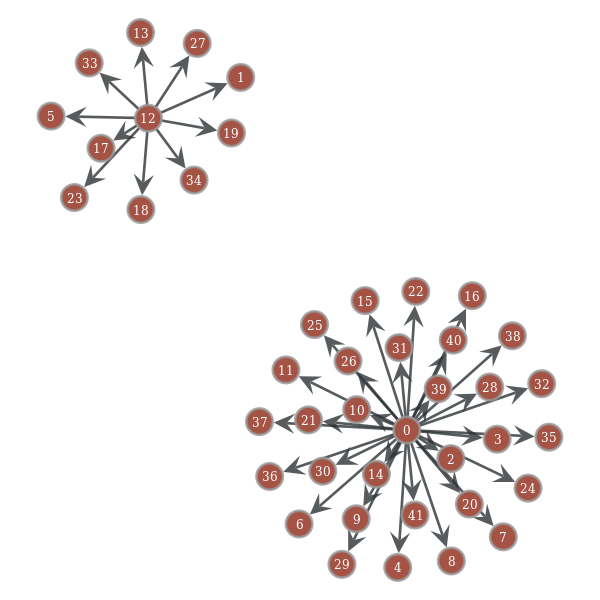

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f0085dca208, at 0x7f0086430eb8>

In [110]:
graph_draw(g,vertex_text=g.vertex_properties['name'], vertex_fill_color=g.vertex_properties['color'])
#graph_draw(g,vertex_size=g.vertex_properties['vsize'], vertex_fill_color=g.vertex_properties['color'])

# Add generated sequences to the graph

In [140]:
ecclass = '4.1.2.44'

clusters_file = open(f'/agh/projects/noelia/NLP/zymCTRL/mmseqs-search-analysis/cluster_classes/fastas/{ecclass}/fiftyclusterRes_cluster.tsv')

clusters = {}
for line in clusters_file:
    rep, other = line.split()
    if not rep in clusters:
        clusters[rep] = []
    clusters[rep].append(other)
        
clusters_file.close()

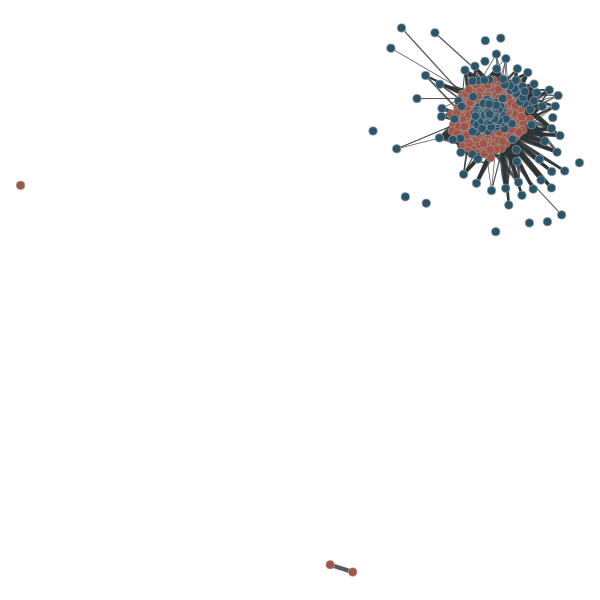

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f008635ccf8, at 0x7efffcc91160>

In [141]:
g = Graph()
g.set_directed(False)
g.vp.name = g.new_vertex_property("string")
g.vp.type = g.new_vertex_property("string")
g.vp.color = g.new_vertex_property("string")
g.vp.vsize = g.new_vertex_property("int")
g.ep.ident = g.new_edge_property("int")
for key in clusters.keys(): 
    v = g.add_vertex()
    g.vp.name[v] = key.split('_')[1]
    g.vp.type[v] = 'rep'
    g.vp.color[v] = "#A45345"
    g.vp.vsize[v] = 20
for key,values in clusters.items():
    for value in values:
        if key.split('_')[1] == value.split('_')[1]:
            continue
        v2 = g.add_vertex()
        g.vp.name[v2] = value.split('_')[1]
        g.vp.type[v2] = 'nat'
        g.vp.color[v2] = "#A45345"
        g.vp.vsize[v2] = 20
        v1 = find_vertex(g, g.vp.name, key.split('_')[1])[0]
        ae = g.add_edge(v1, v2)
        g.ep.ident[ae] = 80
        
        
pos = sfdp_layout(g)
g.vp.pos = g.new_vertex_property("vector<double>")
g.vp.pos = pos


matched_hits = []

with open(f'/agh/projects/noelia/NLP/zymCTRL/mmseqs-search-analysis/generation/{ecclass}/alnres') as myfile:
    head = myfile.readlines()

for line in head:
    gen, nat, ident = line.split()[:3]
    # vertex 1: generated
    if float(ident) < 0.5 : continue
    vertices_in_v1 = find_vertex(g, g.vp.name, gen.split('_',maxsplit=1)[1])
    if not vertices_in_v1:
        v1 = g.add_vertex()
        g.vp.name[v1] = gen.split('_',maxsplit=1)[1]
        g.vp.type[v1] = 'gen'
        g.vp.color[v1] = "#29556C"
        g.vp.vsize[v1] = 10
        
    # vertex2: the natural one
    v2 = find_vertex(g, g.vp.name, nat.split('_')[1])[0]
    ae = g.add_edge(v1, v2)
    g.ep.ident[ae] = float(ident)*100
    
brenda_matches.close()

graph_draw(g,vertex_fill_color=g.vertex_properties['color'],edge_pen_width=prop_to_size(g.ep.ident))

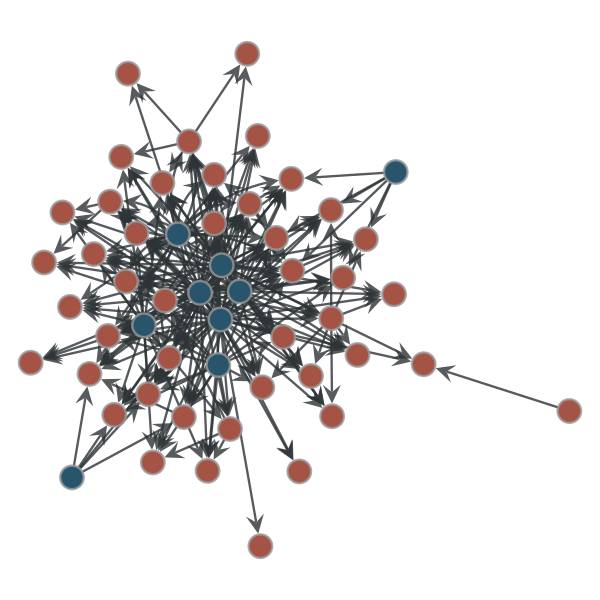

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f0086399518, at 0x7f0086404390>

# Plot natural graph for carbonic anhydrases

In [80]:
brenda_matches = open('/agh/projects/noelia/NLP/zymCTRL/mmseqs-search-analysis/cluster_classes/fastas/4.2.1.1/alnRes.m8')


In [81]:
hits = []
for line in brenda_matches:
    query, sbjct, ident = line.split()[:3]
    if query == sbjct:
        continue
        
    if (float(columns[2]) > 0.5 and float(columns[3]) > 100):
        hits.append((query, sbjct, ident))
        
brenda_matches.close()

In [82]:
len(hits)

13348413

In [83]:
import numpy as np
unique_hits = np.unique([(x[0],x[1]) for x in hits])

In [84]:
len(unique_hits)

44805

In [89]:
g = Graph()
g.set_directed(False)
g.vp.name = g.new_vertex_property("string")
g.ep.ident = g.new_edge_property("float")

for vertex in unique_hits:
    v1 = g.add_vertex()
    g.vp.name[v1] = vertex
    

In [90]:
g

<Graph object, undirected, with 44805 vertices and 0 edges at 0x7f79583aa898>

In [92]:
for hit in hits:
    v1 = find_vertex(g, g.vp.name, hit[0])[0]
    v2 = find_vertex(g, g.vp.name, hit[1])[0]
    ae = g.edge(v1, v2)
    if not ae:
        ae = g.add_edge(v1, v2)
        g.ep.ident[ae] = float(hit[2])*100

In [93]:
g

<Graph object, undirected, with 44805 vertices and 9505142 edges at 0x7f79583aa898>

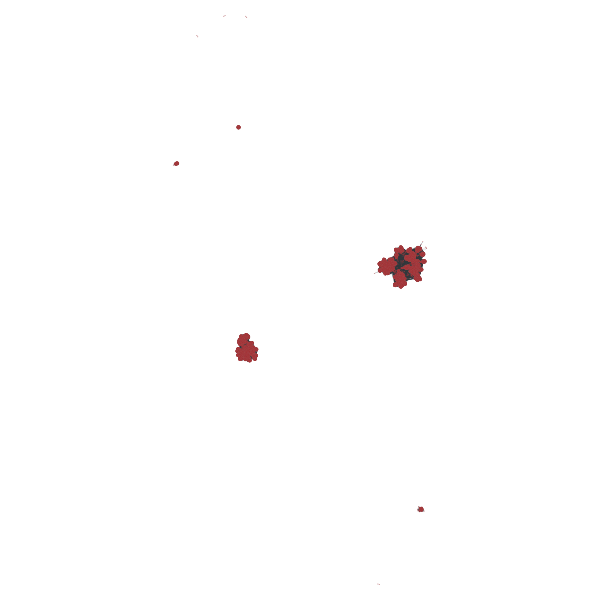

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f79583aa898, at 0x7f7a97ad0f60>

In [94]:
graph_draw(g)

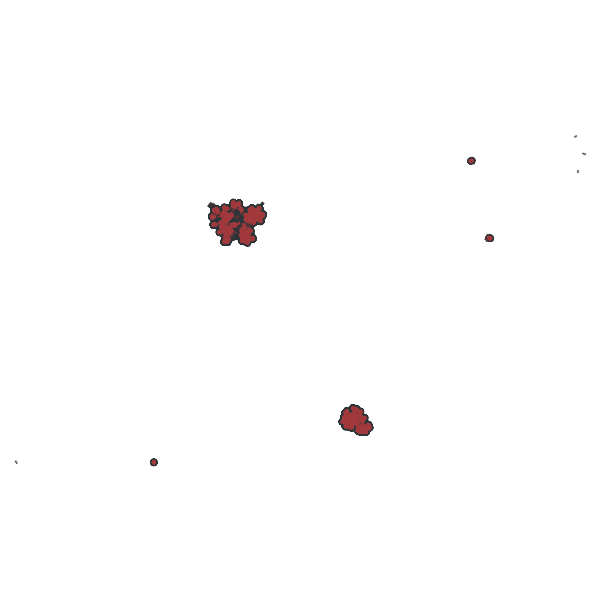

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f79583aa898, at 0x7f7ab80406a0>

In [96]:
graph_draw(g,edge_pen_width=prop_to_size(g.ep.ident))

In [115]:
        pos = sfdp_layout(g)
        g.vp.pos = g.new_vertex_property("vector<double>")
        g.vp.pos = pos


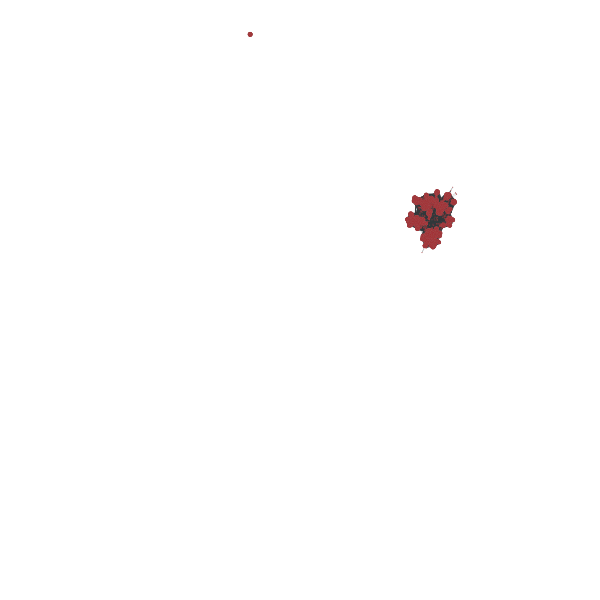

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f79583aa898, at 0x7f79248f5cc0>

In [124]:
frag = [i for i, x in enumerate(comp.a) if x == 2 or x==1]
vfilt = g.new_vertex_property('bool')
for i in frag:
    vfilt[i] = True
sub = GraphView(g,vfilt)
graph_draw(sub,g.vp.pos)

In [105]:
def get_representative_domain(frag,comp):
        degrees=[]
        for vertex in g.vertices():
            v1 = g.vertex(vertex)
            degrees.append(v1.out_degree())
        degree = [(x, i) for i, x in enumerate(degrees) if comp.a[i] == frag]
        most_connected_vertices = [x[1] for x in degree if x[0] == max(degree)[0]]
        # if there are several vertices equally connected, select that one
        # whose length is the closest to the average.
        if len(most_connected_vertices) > 1:
            target = g.sizes[frag][0]
            verts_len = []
            for vertex in most_connected_vertices:
                start = int(round(np.mean(g.vp.start[vertex])))
                end = int(round(np.mean(g.vp.end[vertex])))
                length = int(end) - int(start)
                verts_len.append(length)
            vertice = most_connected_vertices[min(range(len(verts_len)), key=lambda i: abs(verts_len[i] - target))]
        else:
            vertice = most_connected_vertices[0]
        return vertice

In [114]:
get_representative_domain(2,comp)

35873

In [97]:
comp, hist = label_components(g)

In [107]:
hist

array([14455, 29279,   466,   350,   247,     2,     2,     2,     2],
      dtype=uint64)

In [98]:
print("There are ", max(comp.a), " fragments")

There are  8  fragments


In [125]:
g.vp.name[35873]

'4.2.1.1_42300'

In [110]:
pwd

'/agh/projects/noelia/NLP/zymCTRL/github/zymCTRL'

In [111]:
g.save('/agh/projects/noelia/NLP/zymCTRL/mmseqs-search-analysis/cluster_classes/fastas/4.2.1.1/graph.xml')